In [14]:
import time
import datetime
import pytz
import glob
import re
from typing import Dict, List, Optional, Tuple, Union

import numpy as np
import pandas as pd

import pylab
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang.analysis.listserv import ListservMailList
from bigbang.ingress.listserv import ListservMailList as Ingress

from bigbang.visualisation import stackedareachart
from bigbang.visualisation import lines
from bigbang.visualisation import utils
from bigbang.analysis.utils import (
    get_index_of_msgs_with_subject,
    get_index_of_msgs_with_datetime,
)
from bigbang.bigbang_io import pandas_dataframe_to_mbox

plt.style.use("publication_jcap.mplstyle")

In [15]:
# Important dates
standard_release_info = pd.read_csv(
    "/home/christovis/InternetGov/bigbang/bigbang/analysis/3GPP_standards_release_dates.csv",
    sep=",",
    header=2,
    index_col=False,
)
standard_release_info['Start date'] =  pd.to_datetime(standard_release_info['Start date'], format='%Y-%m-%d')
standard_release_year = [dt.year for dt in standard_release_info['Start date']]

# Domain names
folder_path = "/home/christovis/InternetGov/proj1_3gpp_and_comp/keywords"
with open(f"{folder_path}/email_domain_names_china.txt") as f:
    email_domain_names_china = f.readlines()
    email_domain_names_china = [l.rstrip('\n') for l in email_domain_names_china]
eifs = email_domain_names_china  # entity-in-focus

# Mailing list
mlist_name = "3GPP_TSG_SA_WG3_LI"
filepath = f"/home/christovis/InternetGov/bigbang-archives/3GPP/{mlist_name}.mbox"
mlist = ListservMailList.from_mbox(
    name=mlist_name,
    filepath=filepath,
)

In [16]:
mlist.df.columns

Index(['content-transfer-encoding', 'mime-version', 'message-id', 'sender',
       'subject', 'from', 'date', 'content-type', 'reply-to', 'archived-at',
       'body', 'in-reply-to', 'comments-to', 'organization',
       'content-disposition'],
      dtype='object')

# Integrated Time

In [10]:
def format_dictionary(dic: dict, threshold: Union[int, float]) -> dict:
    dic_sorted = {list(dic.keys())[indx]: list(dic.values())[indx] for indx in np.argsort(list(dic.values()))[::-1]}

    percentages = ListservList.to_percentage(list(dic_sorted.values()))
    dic_sorted = {key: value for key, value in zip(dic_sorted.keys(), percentages)}

    dic_filtered = {"others": 0}
    
    if isinstance(threshold, int):
        for index, (key, value) in enumerate(dic_sorted.items()):
            if index <= threshold:
                dic_filtered[key] = value
            else:
                dic_filtered["others"] += value
    elif isinstance(threshold, float):
        for key, value in dic_sorted.items():
            if value >= threshold:
                dic_filtered[key] = value
            else:
                dic_filtered["others"] += value
    return dic_filtered

In [11]:
dic = mlist.get_threadsrootcount(per_address_field=['domain'], per_year=False)

NameError: name 'ListservList' is not defined

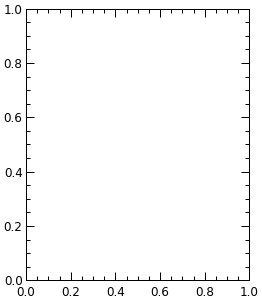

In [12]:
fig, axis = plt.subplots(
    1, 1,
    figsize=(4, 5),
)

threshold = 6
dict_filtered = format_dictionary(dic, threshold)
nr_colors = len(dict_filtered.values()) + 3
cmap = cm.binary(np.arange(nr_colors) / nr_colors)

axis.pie(
    dict_filtered.values(),
    radius=3.,
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-'},
    labels=dict_filtered.keys(),
    labeldistance=1.2,
    autopct='%1.f%%',
    shadow=False,
    startangle=90,
    colors=cmap,
)
axis.axis('equal')

axis.set_title(mlist_name)

"""
plt.savefig(
    f"sums_started_threads_pie_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""

In [ ]:
dicts = mlist.get_localpartscount(header_fields=['from', 'comments-to'], per_domain=True, per_year=False)

In [ ]:
fig, axis = plt.subplots(
    2, 1,
    figsize=(4, 10),
)

threshold = 6

dict_filtered = format_dictionary(dicts["from"], threshold)
nr_colors = len(dict_filtered.values()) + 3
cmap = cm.binary(np.arange(nr_colors) / nr_colors)

axis[0].pie(
    dict_filtered.values(),
    radius=3.,
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-'},
    labels=dict_filtered.keys(),
    labeldistance=1.2,
    autopct='%1.f%%',
    shadow=False,
    startangle=90,
    colors=cmap,
)
axis[0].axis('equal')

dict_filtered = format_dictionary(dicts["comments-to"], threshold)
nr_colors = len(dict_filtered.values()) + 3
cmap = cm.binary(np.arange(nr_colors) / nr_colors)

axis[1].pie(
    dict_filtered.values(),
    radius=3.,
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-'},
    labels=dict_filtered.keys(),
    labeldistance=1.2,
    autopct='%1.f%%',
    shadow=False,
    startangle=90,
    colors=cmap,
)
axis[1].axis('equal')

axis[0].set_title(mlist_name)

"""
plt.savefig(
    f"sums_localparts_pie_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""

In [ ]:
dicts = mlist.get_messagescount(header_fields=['from', 'comments-to'], per_address_field='domain', per_year=False)

In [ ]:
dict_filtered = format_dictionary(dicts["from"], threshold)
list(dict_filtered.keys())

In [ ]:
fig, axis = plt.subplots(
    2, 1,
    figsize=(4, 10),
)

threshold = 6

dict_filtered = format_dictionary(dicts["from"], threshold)
nr_colors = len(dict_filtered.values()) + 3
cmap = cm.binary(np.arange(nr_colors) / nr_colors)

axis[0].pie(
    dict_filtered.values(),
    radius=3.,
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-'},
    labels=dict_filtered.keys(),
    labeldistance=1.2,
    autopct='%1.f%%',
    shadow=False,
    startangle=90,
    colors=cmap,
)
axis[0].axis('equal')

dict_filtered = format_dictionary(dicts["comments-to"], threshold)
nr_colors = len(dict_filtered.values()) + 3
cmap = cm.binary(np.arange(nr_colors) / nr_colors)

axis[1].pie(
    dict_filtered.values(),
    radius=3.,
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-'},
    labels=dict_filtered.keys(),
    labeldistance=1.2,
    autopct='%1.f%%',
    shadow=False,
    startangle=90,
    colors=cmap,
)
axis[1].axis('equal')

axis[0].set_title(mlist_name)

"""
plt.savefig(
    f"sums_messages_pie_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""

# Time Derivative

In [ ]:
dic = mlist.get_threadsrootcount(per_address_field=['domain'], per_year=True)

In [ ]:
fig, axis = plt.subplots(
    1, 1,
    figsize=(7, 6),
    #sharex=True, sharey='row',
    #gridspec_kw={'height_ratios': [2, 1]},
    facecolor="w", edgecolor="k",
)
lines.evolution_of_participation_1D(
    dic,
    ax=axis,
    entity_in_focus=eifs,
    percentage=False,
)
for yr in standard_release_year:
    axis.axvline(x=yr, linestyle=':', color='k', alpha=0.5, zorder=0)

axis.set_title(mlist_name)
axis.set_xlim(2018, 2021)
#axis.set_ylim(0.0, 0.43)
axis.set_xlabel('Year')
axis.set_ylabel('Nr of started threads')
axis.legend(loc=2, edgecolor='white', facecolor='white', framealpha=0.7)

"""
plt.savefig(
    f"sums_started_threads_coun_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""

In [ ]:
dic = mlist.get_localpartscount(header_fields=['from', 'comments-to'], per_domain=True, per_year=True)

In [ ]:
fig, axis = plt.subplots(
    2, 1,
    figsize=(7, 6),
    sharex=True, sharey='row',
    #gridspec_kw={'height_ratios': [2, 1]},
    facecolor="w", edgecolor="k",
)
fig.subplots_adjust(
    hspace=0.05,
    wspace=0.0,
)

lines.evolution_of_participation_1D(
    dic['from'],
    ax=axis[0],
    entity_in_focus=eifs,
    percentage=False,
)
lines.evolution_of_participation_1D(
    dic['comments-to'],
    ax=axis[1],
    entity_in_focus=eifs,
    percentage=False,
)
for yr in standard_release_year:
    axis[0].axvline(x=yr, linestyle=':', color='k', alpha=0.5, zorder=0)
    axis[1].axvline(x=yr, linestyle=':', color='k', alpha=0.5, zorder=0)

axis[0].set_title(mlist_name)
axis[0].set_xlim(2018, 2021)
#axis[0].set_ylim(0.0, 0.32)

axis[1].set_xlim(2018, 2021)
#axis[1].set_ylim(0.0, 0.32)

axis[1].set_xlabel('Year')
axis[0].set_ylabel('Nr of senders')
axis[1].set_ylabel('Nr of receivers')
axis[1].legend(loc=2, edgecolor='white', facecolor='white', framealpha=0.7)

"""
plt.savefig(
    f"sums_localparts_coun_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""

In [ ]:
dic = mlist.get_messagescount(header_fields=['from', 'comments-to'], per_address_field='domain', per_year=True)

In [ ]:
fig, axis = plt.subplots(
    2, 1,
    figsize=(7, 6),
    sharex=True, sharey='row',
    #gridspec_kw={'height_ratios': [2, 1]},
    facecolor="w", edgecolor="k",
)
fig.subplots_adjust(
    hspace=0.05,
    wspace=0.0,
)

lines.evolution_of_participation_1D(
    dic['from'],
    ax=axis[0],
    entity_in_focus=eifs,
    percentage=False,
)
lines.evolution_of_participation_1D(
    dic['comments-to'],
    ax=axis[1],
    entity_in_focus=eifs,
    percentage=False,
)
for yr in standard_release_year:
    axis[0].axvline(x=yr, linestyle=':', color='k', alpha=0.5, zorder=0)
    axis[1].axvline(x=yr, linestyle=':', color='k', alpha=0.5, zorder=0)

axis[0].set_title(mlist_name)
axis[0].set_xlim(2018, 2021)
#axis[0].set_ylim(0.0, 0.49)

axis[1].set_xlim(2018, 2021)
#axis[1].set_ylim(0.0, 0.49)

axis[1].set_xlabel('Year')
axis[0].set_ylabel('Nr of send msgs')
axis[1].set_ylabel('Nr of received msgs')
axis[1].legend(loc=2, edgecolor='white', facecolor='white', framealpha=0.7)

"""
plt.savefig(
    f"sums_messages_coun_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""